In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}

# matplotlib.rc('font', **font)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
def dot_plot(intensity, proportion, row_features, ax=None, col_samples=None, cmap='magma', max_size=100):
    """
        more or less stolen from scanpy   
    
    """
    if col_samples:
        intense_use = intensity.loc[row_features, col_samples]
        prop_use = proportion.loc[row_features, col_samples]
    else:
        intense_use = intensity.loc[row_features]
        prop_use = proportion.loc[row_features]
        col_names = intensity.columns.values
    x, y = np.indices(prop_use.shape)
    y = y.flatten() + 0.5
    x = (x.flatten() + 0.5)
    size = prop_use.values.flatten() * max_size
    color = intense_use.values.flatten()
    if ax:
        ax.scatter(x, y, s=size, c=color, cmap=cmap)
    else:
        plt.scatter(x, y, s=size, c=color, cmap=cmap)
    _ = plt.xticks(np.arange(prop_use.shape[0]) + .5, labels=row_features)
    _ = plt.yticks(np.arange(prop_use.shape[1]) + .5, labels =col_names)

In [4]:
def dotplot_lite(intensity, proportion, ax=None, cmap='magma', 
                 max_size=100, x_names=None, 
                 y_names=None, cbar=True, min_prop=.05):
    """
        minimal dotplot
    """
    
    x, y = np.indices(proportion.shape)
    y = y.flatten() + 0.5
    x = (x.flatten() + 0.5)
    
    size = proportion.flatten()
    size[size<min_prop] = 0
    size = size* max_size
    
    color = intensity.flatten()
    
    if ax:
        im = ax.scatter(x, y, s=size, c=color, cmap=cmap)
    else:
        fig, ax = plt.subplots()
        im = ax.scatter(x, y, s=size, c=color, cmap=cmap)
    if x_names is not None:
        _ = ax.set_xticks(np.arange(proportion.shape[0]) + .5, labels=x_names, rotation = 90)
    if y_names is not None:
        _ = ax.set_yticks(np.arange(proportion.shape[1]) + .5, labels=y_names)
    if cbar:
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.set_label('mean log2 cpm',
                       rotation=270,
                       labelpad=10)
    # if size_bar:
    #     leg = ax.legend(handles=[plt.scatter([],[],
    #                                      s=size, 
    #                                      edgecolors=None, 
    #                                      c='black', label=int(np.floor(
    #                                          (size/320 * term_number.max())/round_to
    #                                      )*round_to)) for size in [320, 240, 120, 80]], title="N genes", 
    #                bbox_to_anchor=(1, 1.025), 
    #                labelspacing=.9)
    return ax

In [5]:
def dot_plot_species(expression_dict, proportion_dict, genes, clusters=None,  species=None, ax=None, cmap='viridis', max_size=100):
    if not species:
        species = [i for i in expression_dict.keys()]
    if clusters:
        intense_use = [expression_dict[specie].loc[genes, clusters] for specie in species] 
        prop_use = [proportion_dict[specie].loc[genes, clusters]  for specie in species] 
    else:
        intense_use = [expression_dict[specie].loc[genes]  for specie in species] 
        prop_use = [proportion_dict[specie].loc[genes]  for specie in species] 
        col_names = intense_use[0].columns.values
    intense_use = pd.concat(intense_use, axis=0)
    prop_use = pd.concat(prop_use, axis=0)
    ax = dotplot_lite(np.flip(intense_use.values.T), np.flip(prop_use.values.T), ax=ax, cmap = cmap, max_size=max_size, y_names=np.flip(intense_use.index), x_names=clusters[::-1])
    return intense_use, prop_use, ax

In [6]:
def dot_plot_species2(expression_dict, 
                      proportion_dict, 
                      genes, 
                      clusters=None, 
                      species=None,
                      ax=None,
                      cmap='viridis', 
                      max_size=100, 
                     duplicate='genes'):
    if not species:
        species = [i for i in expression_dict.keys()]
        
    intense_uses = []
    prop_uses = []
    
    for gene in genes:
        if clusters:
            intense_use = [expression_dict[specie].loc[gene, clusters] for specie in species] 
            prop_use = [proportion_dict[specie].loc[gene, clusters]  for specie in species] 
            intense_uses.append(pd.concat(intense_use, axis=1).T)
            prop_uses.append(pd.concat(prop_use, axis=1).T)
        else:
            intense_use = [expression_dict[specie].loc[gene]  for specie in species] 
            prop_use = [proportion_dict[specie].loc[gene]  for specie in species] 
            col_names = intense_use[0].columns.values
    print(intense_uses[0].shape)
    intense_use = pd.concat(intense_uses, axis=0)
    prop_use = pd.concat(prop_uses, axis=0)
    ax = dotplot_lite(np.flip(intense_use.values.T), np.flip(prop_use.values.T), ax=ax, cmap = cmap, max_size=max_size, y_names=np.flip(intense_use.index), x_names=clusters[::-1])
    return intense_use, prop_use, ax

In [7]:
species_colors={'human' : '#88C2A8',
                'macaque' :	'#7F9BB8',
            'marmoset' : '#CDCE74',
            'mouse' : '#AB6D7C'}

In [8]:
clust_order = ['SST', 'PVALB', 'ChC', 'LAMP5', 'SNCG', 'VIP',   'L2_3_IT', 'L4_5_IT',  'L5_IT', 'L6_IT', 'L6_IT_CAR3', 'L6b', 'L6_CT', 'L5_6_NP', 'L5_ET', 'MGC', 'ASC', 'ODC', 'OPC', 'VLMC', 'Endo']

In [9]:
species = ['human', 'macaque', 'marmoset', 'mouse']

In [10]:
orthologs = pd.read_csv('../../data/ref/four_species_orthologous_protein_coding_genes_1to1_filtered.txt', sep='\t')

In [11]:
logcpm = {specie : pd.read_csv('../../data/processed/gex_for_gls/log2cpm/{}_clusters_orthologous_counts.txt'.format(specie)
                               , sep='\t').set_index('human_gene') for specie in species}

In [12]:
def subset_orthologs(df_, ortholog_table, specie):
    df_use = df_.reindex(ortholog_table[specie + '_gene'])
    df_use.index = ortholog_table['human_gene']
    return df_use

In [13]:
percent_expressed = {specie : subset_orthologs(pd.read_csv('../../data/processed/gex_percent_expressed/{}/all_percent_aggregate.tsv'.format(specie),
                                sep='\t').set_index('Unnamed: 0'), orthologs, specie) for specie in species}

In [14]:
def dot_plot_species3(expression_dict, 
                      proportion_dict, 
                      genes, 
                      clusters=None, 
                      species=None,
                      ax=None,
                      cmap='viridis', 
                      max_size=100, 
                     duplicate='genes',
                     cbar=False):
    if not species:
        species = [i for i in expression_dict.keys()]
        
    intense_uses = []
    prop_uses = []
    
    for gene in genes:
        if clusters:
            intense_use = [expression_dict[specie].loc[gene, clusters] for specie in species] 
            prop_use = [proportion_dict[specie].loc[gene, clusters]  for specie in species] 
            intense_uses.append(pd.concat(intense_use, axis=1).T)
            prop_uses.append(pd.concat(prop_use, axis=1).T)
        else:
            intense_use = [expression_dict[specie].loc[gene]  for specie in species] 
            prop_use = [proportion_dict[specie].loc[gene]  for specie in species] 
            col_names = intense_use[0].columns.values
    print(intense_uses[0].shape)
    intense_use = pd.concat(intense_uses, axis=0)
    prop_use = pd.concat(prop_uses, axis=0)
    ax = dotplot_lite2(prop_use.values, 
                       ax=ax, cmap = cmap, 
                       max_size=max_size, 
                       y_names=np.flip(intense_use.index),
                       x_names=clusters[::-1],
                      cbar=cbar)
    return intense_use, prop_use, ax

In [15]:
def dotplot_lite2(proportion, colors, ax=None,
                  cmap='magma', 
                 max_size=100, x_names=None, 
                  # species_colors={'human' : 	'#88C2A8',
                  #                   'macaque' :	'#7F9BB8',
                  #                   'marmoset' : '#CDCE74',
                  #                 'mouse' : '#AB6D7C'},
                         y_names=None,
                  cbar=True, min_prop=.05):
    """
        minimal dotplot
    """
    
    x, y = np.indices(proportion.shape)
    y = y.flatten() + 0.5
    x = (x.flatten() + 0.5)
    
    size = proportion.flatten()
    size[size<min_prop] = 0
    size = size* max_size
    
    # color = [[species_colors[key] ] * (proportion.shape[0]) for key in species_colors.keys()]
    # color = np.hstack([np.array(color) for i in range(int(proportion.shape[1]/len(species_colors)))])
    color = colors.flatten()
    # intensity.flatten()
    
    if ax:
        im = ax.scatter(y, x, s=size, c=color,)
    else:
        fig, ax = plt.subplots()
        im = ax.scatter(y, x, s=size, c=color,)
    if x_names is not None:
        _ = ax.set_xticks(np.arange(proportion.shape[0]) + .5, labels=x_names, rotation = 90)
    if y_names is not None:
        _ = ax.set_yticks(np.arange(proportion.shape[1]) + .5, labels=y_names)
    if cbar:
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.set_label('mean log2 cpm',
                       rotation=270,
                       labelpad=10)
    # if size_bar:
    #     leg = ax.legend(handles=[plt.scatter([],[],
    #                                      s=size, 
    #                                      edgecolors=None, 
    #                                      c='black', label=int(np.floor(
    #                                          (size/320 * term_number.max())/round_to
    #                                      )*round_to)) for size in [320, 240, 120, 80]], title="N genes", 
    #                bbox_to_anchor=(1, 1.025), 
    #                labelspacing=.9)
    return ax

In [16]:

genes="""SPARC;TEK;THBS2;THBS4"""

genes = genes.split(';')

In [17]:
expression_dict = logcpm
proportion_dict = percent_expressed
clusters = clust_order
intense_uses = []
prop_uses = []
for gene in genes:

    intense_use = [expression_dict[specie].loc[gene, clusters] for specie in species] 
    prop_use = [proportion_dict[specie].loc[gene, clusters] for specie in species] 
    intense_uses.append(pd.concat(intense_use, axis=1).T)
    prop_uses.append(pd.concat(prop_use, axis=1).T)
intense_use = pd.concat(intense_uses, axis=0)
prop_use = pd.concat(prop_uses, axis=0)

In [18]:
species_colors={'human' : 	'#88C2A8',
                'macaque' :	'#7F9BB8',
                'marmoset' : '#CDCE74',
              'mouse' : '#AB6D7C'}

In [19]:
proportion = intense_use

In [20]:
color = [[species_colors[key] ] * (proportion.shape[1]) for key in species_colors.keys()]
color = np.vstack([np.array(color) for i in range(int(proportion.shape[0]/len(species_colors)))]).T

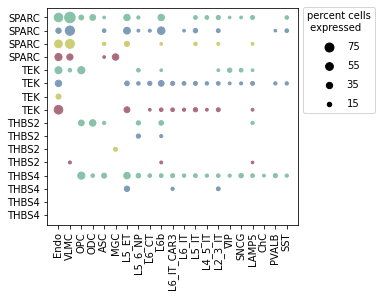

In [21]:
fig, ax = plt.subplots(figsize=(4.5, 4))
dotplot_lite2(np.flip(prop_use.values ), colors=np.flip(color.T), 
              max_size=140, ax=ax, cbar=False, 
             # x_names = clust_order,
             )
round_to = 5
leg = ax.legend(handles=[plt.scatter([],[],
                                     s=size, 
                                     edgecolors=None, 
                                     c='black', label=int(np.floor(
                                         (size/80 * prop_use.max().max()*100)/round_to
                                     )*round_to)) for size in [80, 60, 40, 20]], title="percent cells\n expressed", 
               bbox_to_anchor=(1, 1.025), 
               labelspacing=.9)
_ =ax.set_xticks(np.arange(intense_use.shape[1])+.5, intense_use.columns[::-1], rotation=90)
_= ax.set_yticks(np.arange(intense_use.shape[0]) + .5, np.flip(intense_use.index))
plt.savefig('../../figures/OPC_np_up_dotplt.pdf', dpi=400, bbox_inches='tight')

In [84]:
genes="""FABP5;FABP6;FABP7;CPS1"""
genes = genes.split(';')

In [85]:
expression_dict = logcpm
proportion_dict = percent_expressed
clusters = clust_order
intense_uses = []
prop_uses = []
for gene in genes:

    intense_use = [expression_dict[specie].loc[gene, clusters] for specie in species] 
    prop_use = [proportion_dict[specie].loc[gene, clusters] for specie in species] 
    intense_uses.append(pd.concat(intense_use, axis=1).T)
    prop_uses.append(pd.concat(prop_use, axis=1).T)
intense_use = pd.concat(intense_uses, axis=0)
prop_use = pd.concat(prop_uses, axis=0)

In [86]:
species_colors={'human' : 	'#88C2A8',
                'macaque' :	'#7F9BB8',
                'marmoset' : '#CDCE74',
              'mouse' : '#AB6D7C'}

In [87]:
proportion = intense_use

In [88]:
color = [[species_colors[key] ] * (proportion.shape[1]) for key in species_colors.keys()]
color = np.vstack([np.array(color) for i in range(int(proportion.shape[0]/len(species_colors)))]).T

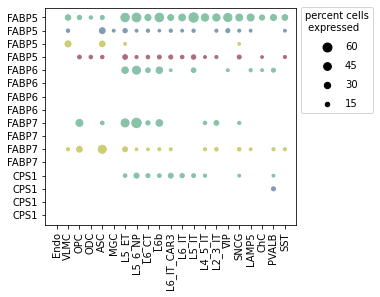

In [89]:
fig, ax = plt.subplots(figsize=(4.5, 4))
dotplot_lite2(np.flip(prop_use.values ), colors=np.flip(color.T), 
              max_size=140, ax=ax, cbar=False, 
             # x_names = clust_order,
             )
round_to = 5
leg = ax.legend(handles=[plt.scatter([],[],
                                     s=size, 
                                     edgecolors=None, 
                                     c='black', label=int(np.floor(
                                         (size/80 * prop_use.max().max()*100)/round_to
                                     )*round_to)) for size in [80, 60, 40, 20]], title="percent cells\n expressed", 
               bbox_to_anchor=(1, 1.025), 
               labelspacing=.9)
_ =ax.set_xticks(np.arange(intense_use.shape[1])+.5, intense_use.columns[::-1], rotation=90)
_= ax.set_yticks(np.arange(intense_use.shape[0]) + .5, np.flip(intense_use.index))
plt.savefig('../../figures/L5_6_np_up_dotplt.pdf', dpi=400, bbox_inches='tight')

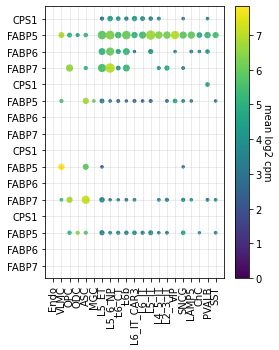

In [34]:
fig, ax = plt.subplots(figsize=(4, 5))
inten, prop, ax = dot_plot_species(logcpm,
                                   percent_expressed, 
                                    genes,
                                   clusters=clust_order,
                                   cmap='viridis',
                                   species=['human', 
                                            'macaque', 
                                            'marmoset', 
                                            'mouse'], 
                                    max_size=110, ax=ax)
ax.grid(alpha=.3)        
plt.savefig('../../figures/L5_6_np_up_dotplt.pdf', dpi=400, bbox_inches='tight')

In [35]:

genes="""SPARC;TEK;THBS2;THBS4"""

genes = genes.split(';')

NameError: name 'dot_plot_species2' is not defined

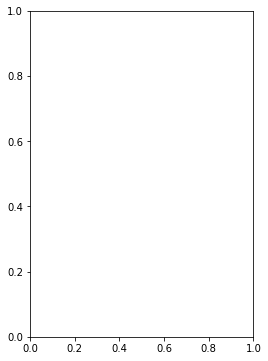

In [36]:
fig, ax = plt.subplots(figsize=(4, 6))
inten, prop, ax = dot_plot_species2(logcpm, percent_expressed, 
                                   genes, clusters=clust_order, cmap='viridis',
                                   species=['human', 
                                            'macaque', 
                                            'marmoset', 
                                            'mouse'], max_size=110, ax=ax)
ax.grid(alpha=.3)        

NameError: name 'dot_plot_species2' is not defined

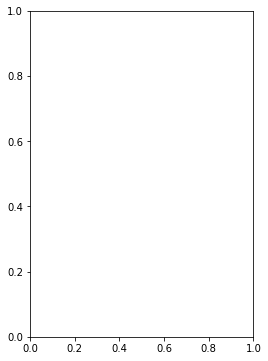

In [37]:
fig, ax = plt.subplots(figsize=(4, 6))
inten, prop, ax = dot_plot_species2(logcpm, percent_expressed, 
                                   ['RYR3'],
                                    clusters=clust_order, cmap='viridis',
                                   species=['human', 
                                            'macaque', 
                                            'marmoset', 
                                            'mouse'], max_size=110, ax=ax)
ax.grid(alpha=.3)        

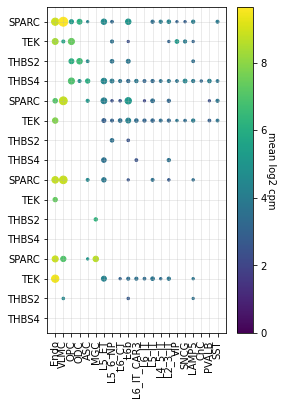

In [38]:
fig, ax = plt.subplots(figsize=(4, 6))
inten, prop, ax = dot_plot_species(logcpm, percent_expressed, genes, 
                                   clusters=clust_order, cmap='viridis', 
                                  ax=ax)
ax.grid(alpha=.3)        

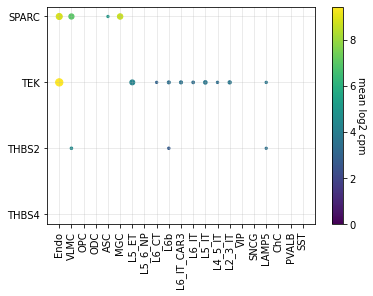

In [39]:
# fig, ax = 
inten, prop, ax = dot_plot_species(logcpm, percent_expressed, genes, clusters=clust_order, cmap='viridis', species=['mouse'])
ax.grid(alpha=.3)        

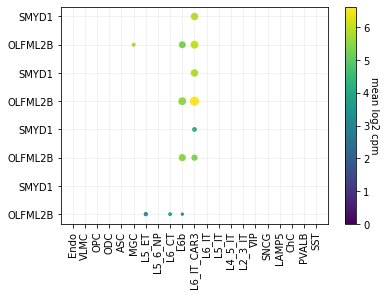

In [40]:
inten, prop, ax = dot_plot_species(logcpm, percent_expressed, genes=['SMYD1', 'OLFML2B'], clusters=clust_order, cmap='viridis', species=None)
ax.grid(alpha=.2)

In [41]:
all_cons = ['NIPBL', 'USP34', 'RBM39', 'SRSF11', 'TRIP12', 'PUM2', 'HECTD1',
       'PAFAH1B1', 'PAPOLA', 'ZFR']

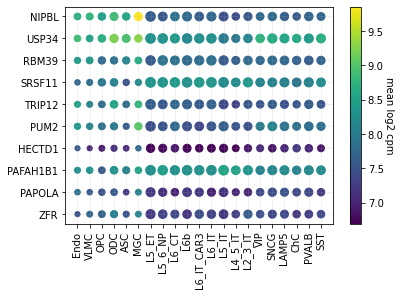

In [42]:
inten, prop, ax = dot_plot_species(logcpm, percent_expressed, genes=all_cons, clusters=clust_order, cmap='viridis', species=['human'])
ax.grid(alpha=.2)

In [43]:
percent_expressed['human'].loc['FOXP2']

ASC           0.012589
ChC           0.010101
Endo          0.023599
L2_3_IT       0.145356
L4_5_IT       0.509865
L5_6_NP       0.963415
L5_ET         0.162921
L5_IT         0.839907
L6b           0.830935
L6_CT         0.977353
L6_IT_CAR3    0.157282
L6_IT         0.751024
LAMP5         0.027327
MGC           0.736939
ODC           0.006672
OPC           0.002125
PVALB         0.047460
SNCG          0.056507
SST           0.022718
VIP           0.011416
VLMC          0.365079
Name: FOXP2, dtype: float64

# heatmaps

In [44]:
import seaborn as sns

In [45]:
import sys
sys.path.insert(0, '../../scripts')

In [46]:
from common_funcs import *

In [47]:
cons_info = pd.read_csv('../../data/outputs/final/gex_conservation_annotation.tsv', sep='\t').set_index('Unnamed: 0')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/outputs/final/gex_conservation_annotation.tsv'

In [ ]:
cons_info.head()

In [48]:
h_data = logcpm['human']

In [117]:
h_data.head()

,ASC,ChC,Endo,L2_3_IT,L4_5_IT,L5_6_NP,L5_ET,L5_IT,L6b,L6_CT,...,L6_IT,LAMP5,MGC,ODC,OPC,PVALB,SNCG,SST,VIP,VLMC
human_gene,,,,,,,,,,,,,,,,,,,,,
A1BG,2.121234,1.999370,3.606849,3.974951,4.024523,3.168008,3.367201,3.542102,3.982342,3.486416,...,3.719901,3.851043,2.202384,4.676688,1.876346,1.846370,3.452110,2.636701,3.112974,5.518641
A1CF,0.000000,0.000000,0.000000,0.258929,0.790790,0.000000,1.549928,0.319208,0.737175,1.138096,...,0.797406,0.254889,0.000000,0.018806,0.269626,0.557767,0.228300,0.353448,0.445192,0.000000
A3GALT2,0.000000,0.806995,0.000000,0.235030,0.224616,0.000000,0.000000,0.319208,0.000000,0.378762,...,0.373163,0.254889,0.000000,0.519028,0.269626,0.082701,0.893183,0.151916,0.567539,0.000000
A4GALT,0.983514,0.459202,5.470400,0.160861,0.078822,0.000000,0.000000,0.114432,0.000000,0.201776,...,0.000000,0.367221,1.138026,0.144004,0.000000,0.160917,0.228300,0.151916,0.239700,5.944839
A4GNT,0.188541,0.000000,0.000000,0.055637,0.078822,0.000000,0.000000,0.000000,0.180634,0.000000,...,0.000000,0.000000,0.000000,0.037371,0.269626,0.082701,0.000000,0.077957,0.084403,0.000000


In [137]:
h_data[clust_order].dropna().shape

(15686, 21)

In [140]:
h_data = h_data[clust_order].dropna()

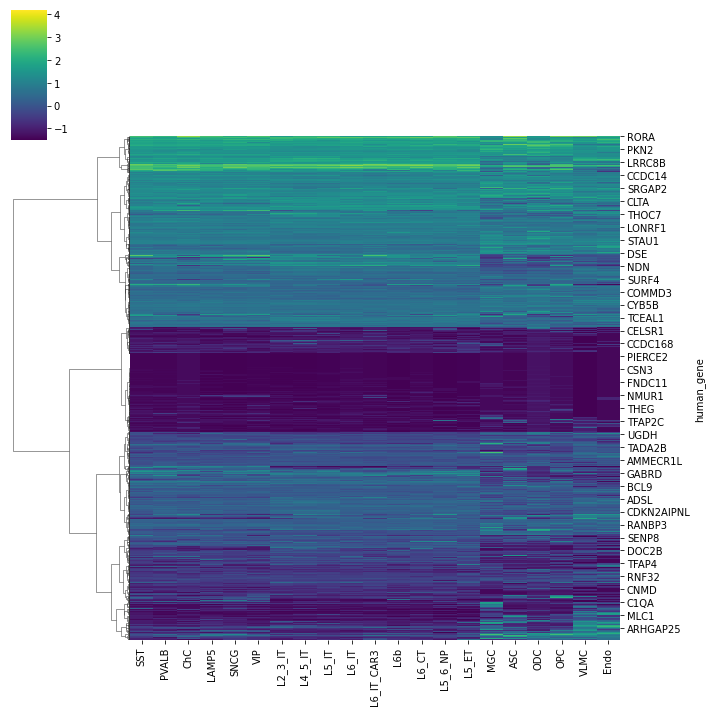

In [158]:
sns.clustermap(h_data, 
               method='ward', 
               metric='euclidean',
               z_score=1,
               col_cluster=False,
              cmap='viridis')

In [187]:
h_data.shape

(15686, 21)

In [185]:
save_list('../../data/outputs/final/level1_cons.txt', cons_info.index[cons_info.level1_macaque &
                                          cons_info.level1_marmoset &
                                          cons_info.level1_mouse])

55496

In [186]:
save_list('../../data/outputs/final/level0_cons.txt', h_data.index)

99244

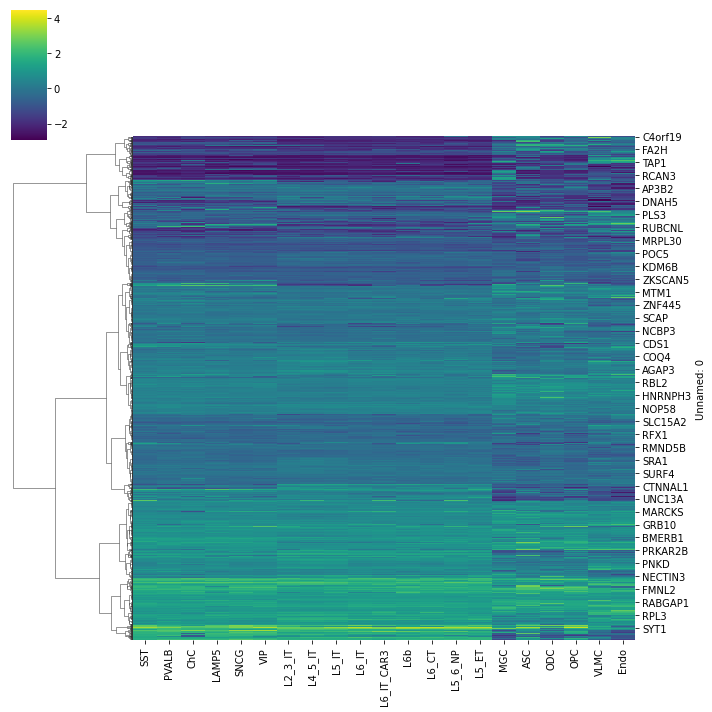

In [156]:
sns.clustermap(h_data.loc[cons_info.index[cons_info.level1_macaque &
                                          cons_info.level1_marmoset &
                                          cons_info.level1_mouse]],
                method='ward', 
               metric='euclidean',
               z_score=1,
               col_cluster=False,
              cmap='viridis')

In [178]:
np.sum(cons_info.level1_macaque &
                                          cons_info.level1_marmoset &
                                          cons_info.level1_mouse)

8799

In [159]:
cons_info.head()

,four_species_1to1_ortholog,putative_human_specific,level3_all,level3_primate,level1_macaque,level1_marmoset,level1_mouse,ASC_active,ChC_active,Endo_active,...,level2_mouse_L6_IT,level2_mouse_LAMP5,level2_mouse_MGC,level2_mouse_ODC,level2_mouse_OPC,level2_mouse_PVALB,level2_mouse_SNCG,level2_mouse_SST,level2_mouse_VIP,level2_mouse_VLMC
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
A1BG,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A1CF,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
A2M,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
A2ML1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
A3GALT2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [167]:
from itertools import product

In [172]:
import sys
sys.path.insert(0, '../../scripts')

In [173]:
from common_funcs import list_intersection

In [175]:
def list_intersection(to_intersect):
    '''
    get elements in the intersection of a group of lists/arrays
    
    args:
        to_intersect : a list of lists or other listlike objects
    returns:
        common : a numpy array of all elements common in all lists
    
    '''
    common = to_intersect[0]
    for item in to_intersect[1:]:
        common = np.intersect1d(common, item)
    return common

/home/ethan/conda_envs/gsea/lib/python3.10/site-packages/seaborn/matrix.py:657: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


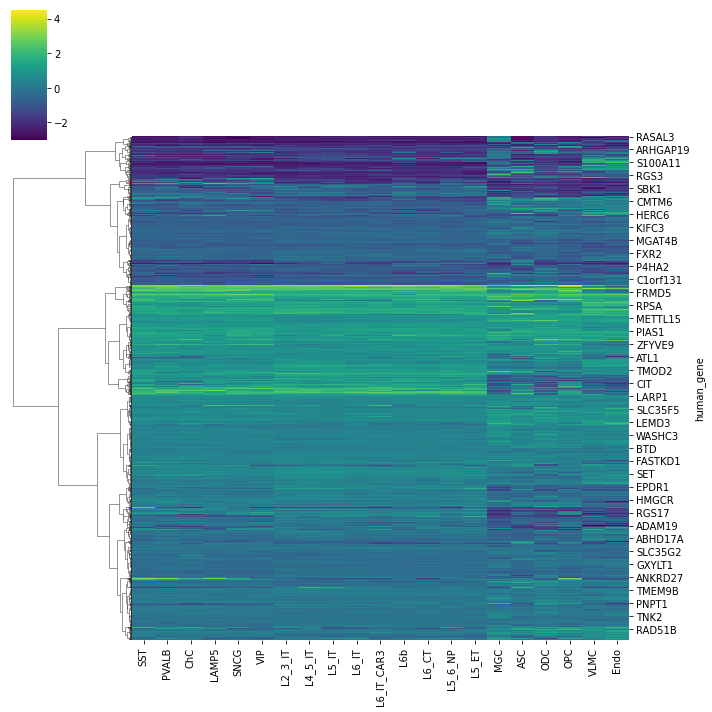

In [176]:
level2 = []
for specie in ['macaque', 'mouse', 'marmoset']:
    check_cols  = ['level2_{}_'.format(specie) + clust for clust in clust_order]
    l2_genes = cons_info.index == 'get_series_all_false'
    for col in check_cols:
        l2_genes = l2_genes | cons_info[col]
    level2.append(cons_info.index[l2_genes])
level2 = list_intersection(level2)
    
sns.clustermap(h_data.loc[level2],
                method='ward', 
               metric='euclidean',
               z_score=1,
               col_cluster=False,
              cmap='viridis')

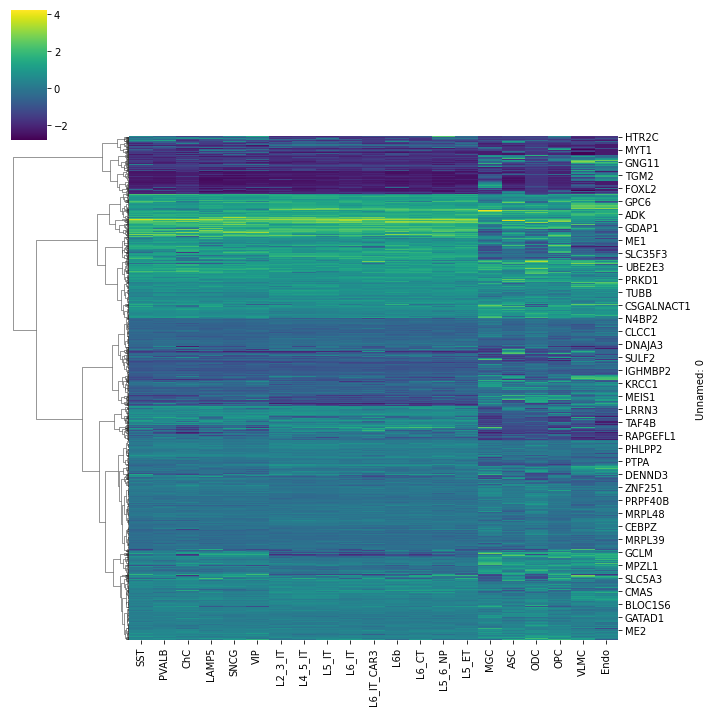

In [180]:
sns.clustermap(h_data.loc[cons_info.index[cons_info.level3_primate]],
                method='ward', 
               metric='euclidean',
               z_score=1,
               col_cluster=False,
              cmap='viridis')

In [184]:
np.sum(cons_info.level3_primate)

2638

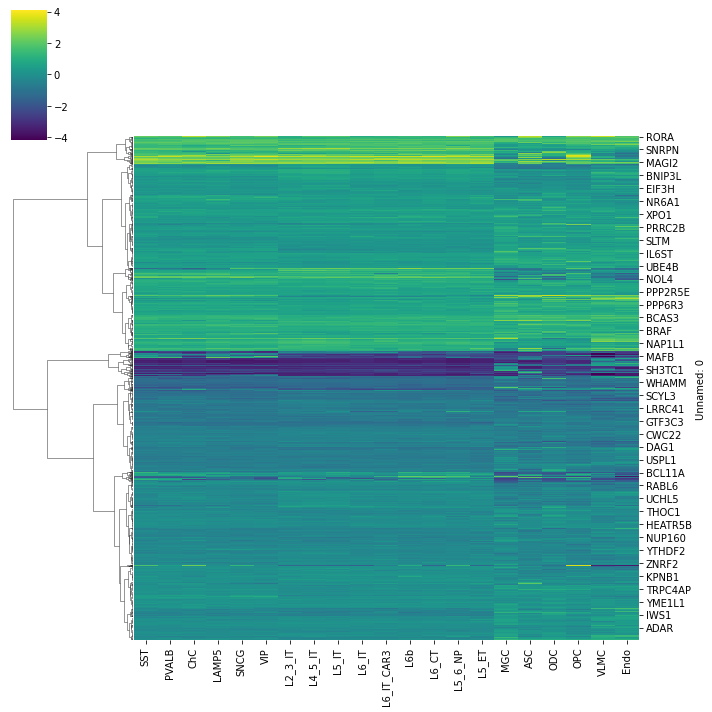

In [181]:
sns.clustermap(h_data.loc[cons_info.index[cons_info.level3_all]],
                method='ward', 
               metric='euclidean',
               z_score=1,
               col_cluster=False,
              cmap='viridis')

In [182]:
np.sum(cons_info.level3_all)

2689

In [177]:
len(level2)

8311

In [126]:
?sns.clustermap

Signature:
sns.clustermap(
    data,
    *,
    pivot_kws=None,
    method='average',
    metric='euclidean',
    z_score=None,
    standard_scale=None,
    figsize=(10, 10),
    cbar_kws=None,
    row_cluster=True,
    col_cluster=True,
    row_linkage=None,
    col_linkage=None,
    row_colors=None,
    col_colors=None,
    mask=None,
    dendrogram_ratio=0.2,
    colors_ratio=0.03,
    cbar_pos=(0.02, 0.8, 0.05, 0.18),
    tree_kws=None,
    **kwargs,
)
Docstring:
Plot a matrix dataset as a hierarchically-clustered heatmap.

This function requires scipy to be available.

Parameters
----------
data : 2D array-like
    Rectangular data for clustering. Cannot contain NAs.
pivot_kws : dict, optional
    If `data` is a tidy dataframe, can provide keyword arguments for
    pivot to create a rectangular dataframe.
method : str, optional
    Linkage method to use for calculating clusters. See
    :func:`scipy.cluster.hierarchy.linkage` documentation for more
    information.
metric : str, o